296
2589.49747467041


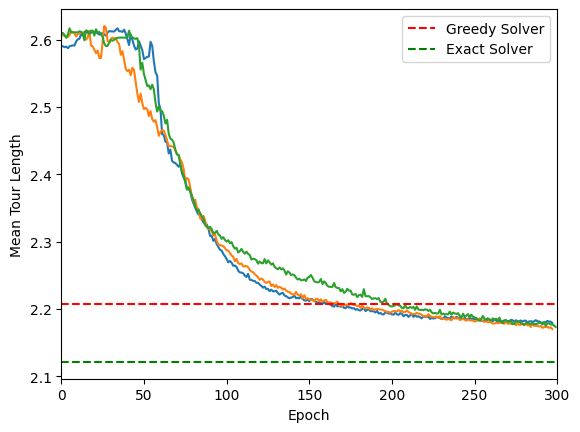

In [12]:
from benchmark_solvers import greedy_tsp,exact_solver
from model import MambaFull
import torch
import torch.nn
import matplotlib.pyplot as plt

coord_dim = 2
city_count = 5
test_size=2000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_data_loc=f'mamba/data/start_2/test_rand_{test_size}_{city_count}_{coord_dim}.pt'
test_data = torch.load(test_data_loc).to(device)

class DotDict(dict):
    def __init__(self, **kwds):
        self.update(kwds)
        self.__dict__ = self

checkpoint = torch.load('mamba/checkpoints/embed/Linear1_18-06_12-34.pt')
checkpoint2 = torch.load('mamba/checkpoints/embed/Linear2_18-06_12-57.pt')
checkpoint3 = torch.load('mamba/checkpoints/embed/Linear3_18-06_13-49.pt')

args = checkpoint['args']
args.mlp_cls = 'identity'
model_train = MambaFull(args.d_model, args.city_count, args.nb_layers, args.coord_dim, args.mlp_cls).to(device)
model_train.load_state_dict(checkpoint['model_state_dict'])
model_train.eval()


mean_tour_length_list = [tensor.cpu().numpy() for tensor in checkpoint['mean_tour_length_list']]
mean_tour_length_list2 = [tensor.cpu().numpy() for tensor in checkpoint2['mean_tour_length_list']]
mean_tour_length_list3 = [tensor.cpu().numpy() for tensor in checkpoint3['mean_tour_length_list']]
print(checkpoint['epoch'])
print(checkpoint['time_tot'])
plt.plot(mean_tour_length_list)
plt.plot(mean_tour_length_list2)
plt.plot(mean_tour_length_list3)

greedy = greedy_tsp(test_data)[0].item()
exact = exact_solver(test_data).item()


plt.axhline(y=greedy, color='r', linestyle='--', label='Greedy Solver')
plt.axhline(y=exact, color='g', linestyle='--', label='Exact Solver')

# Add labels to the axes
plt.xlim(0, 300)
plt.xlabel('Epoch')
plt.ylabel('Mean Tour Length')

plt.legend()
plt.savefig('mamba/figs/mean_tour_length_RL.pdf')
plt.show()

#print(greedy_tsp(test_data_loc))
#print(exact_solver(test_data_loc))